# overview of cv_ridge() usage
- additional kwargs will be passed to solve_ridge()

In [1]:
from __future__ import print_function

import numpy as np

from regression_code.storm import ridge
from regression_code.storm.tests import test_datasets
from regression_code.storm.tests import test_utils

# load data

In [2]:
datasets = test_datasets.load_all()
dataset = datasets['qa_skinny']

Xtrain = dataset['Xtrain']
Xtest = dataset['Xtest']
Ytrain = dataset['Ytrain']
Ytest = dataset['Ytest']

print('Xtrain:', Xtrain.shape)
print('Xtest:', Xtest.shape)
print('Ytrain:', Ytrain.shape)
print('Ytest:', Ytest.shape)

/auto/k1/storm/python_path/storm/storm/utils/stats.py:34: RuntimeWarning: invalid value encountered in divide
  return array / array.std(axis, keepdims=True)
/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:2254: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Xtrain: (1832, 116)
Xtest: (504, 116)
Ytrain: (1832, 92970)
Ytest: (504, 92970)


# perform cross validation

In [3]:
parameters = {
    'weights': True,
    'predictions': True,
    'performance': True,
    'ridges': np.logspace(0, 4, 5),
    'n_folds': 3,
}

results = ridge.cv_ridge(Xtrain, Ytrain, Xtest, Ytest, **parameters)

print()
print()
test_utils.rprint(results, 'results')

Fitting cross-validated ridge model...
- (train, validate, test): (0.523, 0.261, 0.216)
- n_folds: 3
- using cluster: False
- globally optimal parameters: True
- locally optimal parameters: True
- n_ridges: 5
- n_regressors: 116
- n_regressands: 92970
- n_train_samples: 1832
- n_test_samples: 504
- inputs: Xtrain, Ytrain, Xtest, Ytest
- outputs: weights, predictions, performance
- dtype: float64
- additional kwargs: None

Fold 1/3, (train, validate)=(1221, 611)=(0.666, 0.334)
1:     1.0  (5%, 25%, 50%, 75%, 95%)=(-0.048, -0.002, +0.035, +0.084, +0.226)
2:    10.0  (5%, 25%, 50%, 75%, 95%)=(-0.049, -0.002, +0.035, +0.083, +0.226)
3:   100.0  (5%, 25%, 50%, 75%, 95%)=(-0.050, -0.003, +0.034, +0.082, +0.221)
4:  1000.0  (5%, 25%, 50%, 75%, 95%)=(-0.050, -0.003, +0.034, +0.082, +0.220)
5:  10000.  (5%, 25%, 50%, 75%, 95%)=(-0.050, -0.003, +0.034, +0.082, +0.220)

Fold 2/3, (train, validate)=(1221, 611)=(0.666, 0.334)
1:     1.0  (5%, 25%, 50%, 75%, 95%)=(-0.047, -0.001, +0.036, +0.083, +0.

# generate cv report

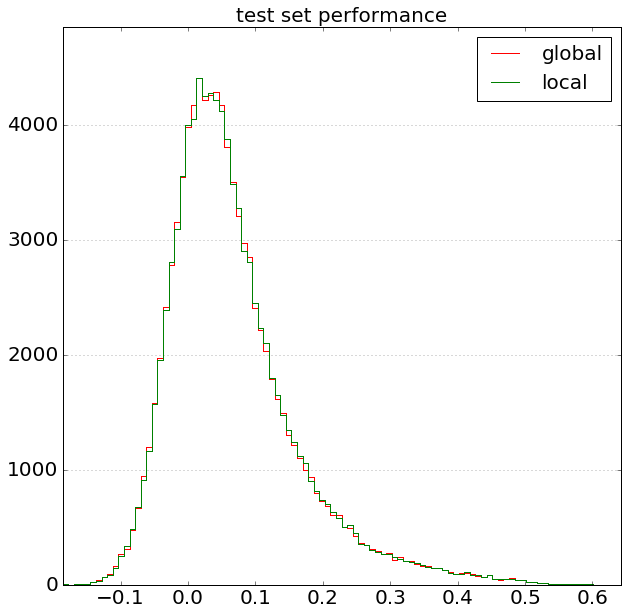

/auto/k1/storm/python_path/storm/storm/utils/plots.py:715: RuntimeWarning: divide by zero encountered in log10
  h = np.log10(h)
/usr/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1215: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1220: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


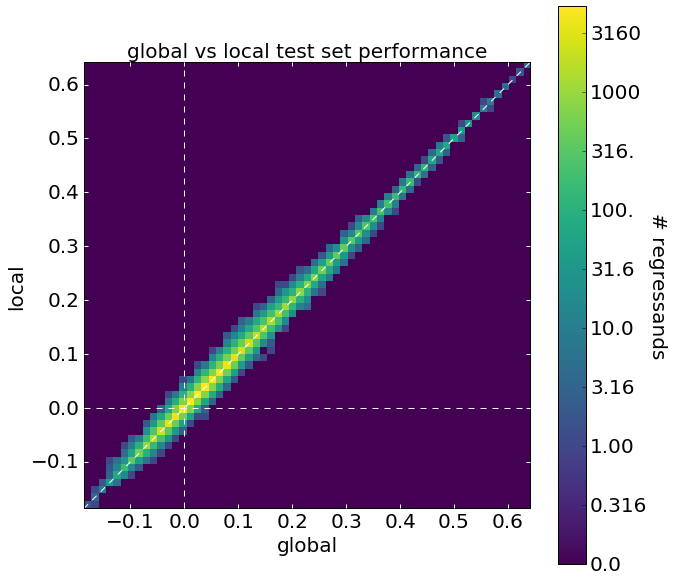

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:439: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


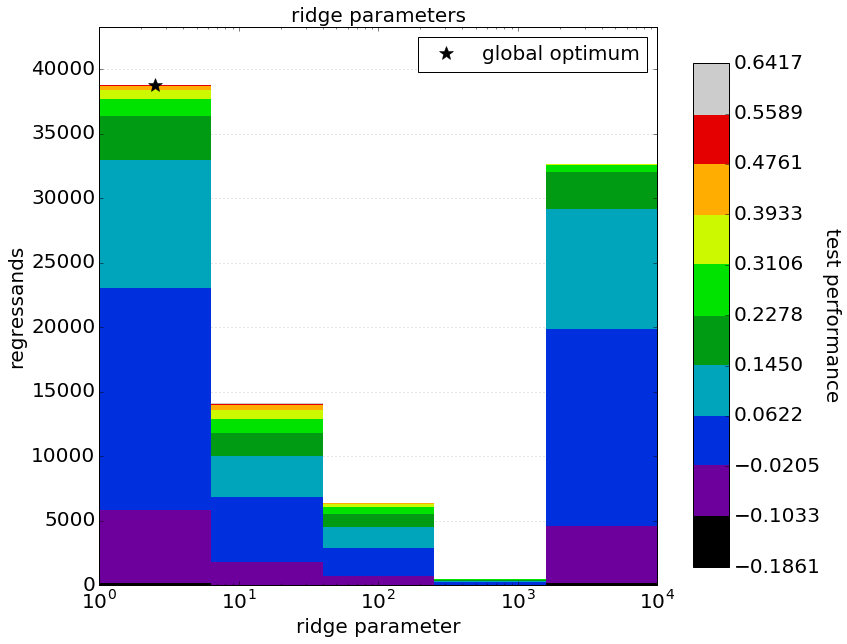

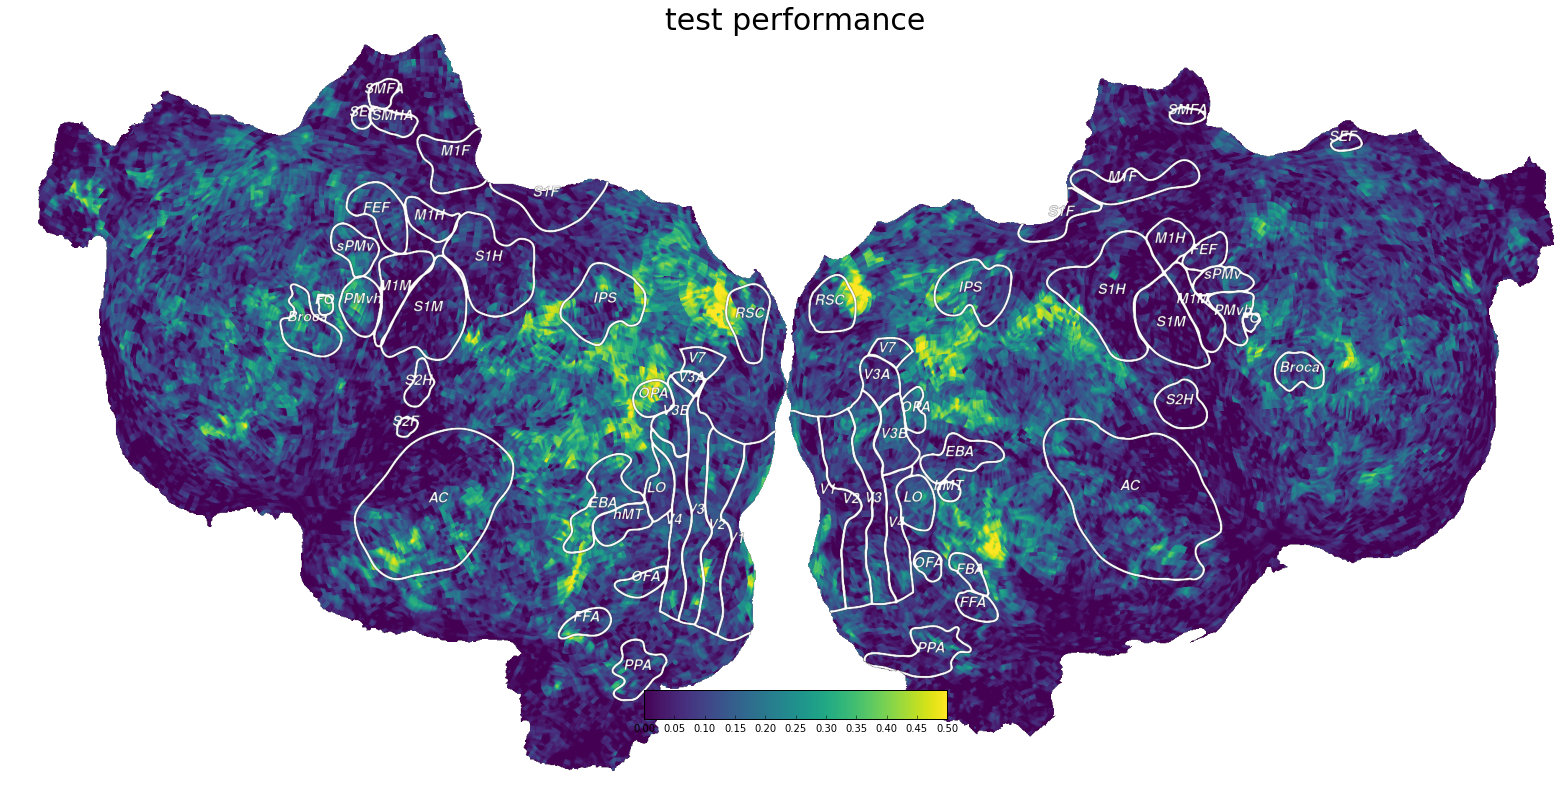

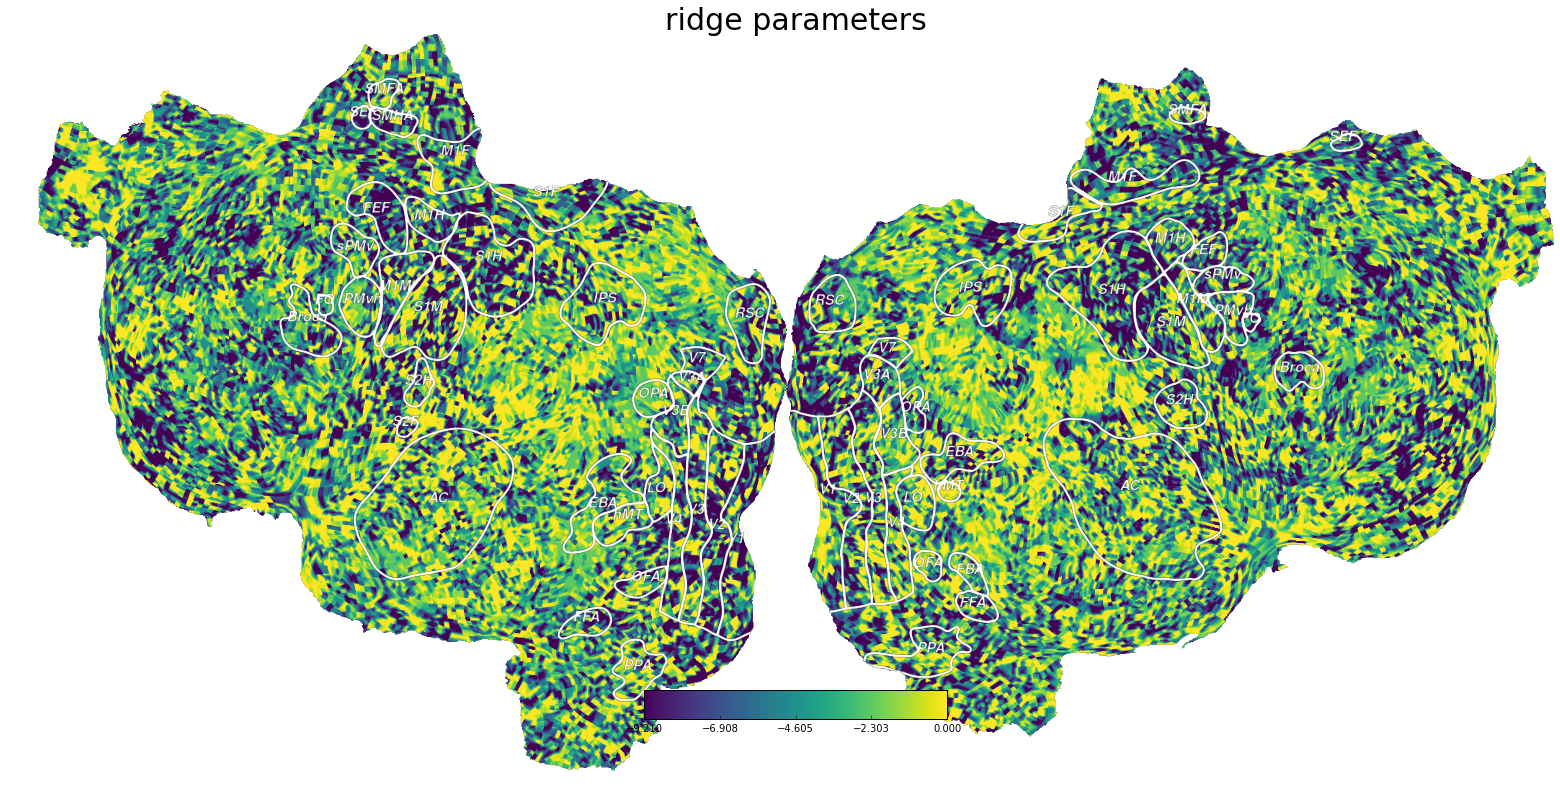

In [5]:
%matplotlib inline

report_parameters = {
    'subject': 'MLfs',
    'transform': '20121210ML_auto1',
    'ridges': np.logspace(0, 4, 5),
    
    'global_vs_local': True,
}

ridge.cv_report(results, **report_parameters)

# use cluster

In [7]:
parameters = {
    'weights': True,
    'predictions': True,
    'performance': True,
    'ridges': np.logspace(0, 4, 30),
    'n_folds': 50,
    'cluster': True,
}

cluster_results = ridge.cv_ridge(Xtrain, Ytrain, Xtest, Ytest, **parameters)

print()
print()
test_utils.rprint(cluster_results, 'cluster_results')

Fitting cross-validated ridge model...
- (train, validate, test): (0.769, 0.015, 0.216)
- n_folds: 50
- using cluster: True
- globally optimal parameters: True
- locally optimal parameters: True
- n_ridges: 30
- n_regressors: 116
- n_regressands: 92970
- n_train_samples: 1832
- n_test_samples: 504
- inputs: Xtrain, Ytrain, Xtest, Ytest
- outputs: weights, predictions, performance
- dtype: float64
- additional kwargs: None

Globally-Optimal Ridge: 1.0
Locally-Optimal Ridges:
        1.0  29683
        1.4  108
        1.9  221
        2.6  332
        3.6  579
        4.9  1006
        6.7  1651
        9.2  2489
       12.7  3838
       17.4  4410
       24.0  3883
       32.9  2822
       45.2  2050
       62.1  1379
       85.3  998
      117.2  595
      161.0  367
      221.2  206
      303.9  103
      417.5  58
      573.6  24
      788.0  18
     1082.6  5
     1487.4  8
     2043.4  2
     2807.2  1
     3856.6  1
     5298.3  1
     7279.0  1
     10000.  36131

Fit with globa

# use kernels

In [8]:
parameters = {
    'weights': False,
    'predictions': True,
    'performance': True,
    'ridges': np.logspace(0, 4, 5),
    'n_folds': 3,
    'sizes': {'n_regressors': Xtrain.shape[1]},
    'Ktrain': Xtrain.dot(Xtrain.T),
    'Ktest': Xtest.dot(Xtrain.T),
    'Ytrain': Ytrain,
    'Ytest': Ytest,
}

results = ridge.cv_ridge(**parameters)

print()
print()
test_utils.rprint(results, 'results')

Fitting cross-validated ridge model...
- (train, validate, test): (0.523, 0.261, 0.216)
- n_folds: 3
- using cluster: False
- globally optimal parameters: True
- locally optimal parameters: True
- n_ridges: 5
- n_regressors: None
- n_regressands: 92970
- n_train_samples: 1832
- n_test_samples: 504
- inputs: Ktrain, Ytrain, Ktrain, Ytest, Ktest
- outputs: predictions, performance
- dtype: float64
- additional kwargs:
    - sizes: {'n_regressors': 116}

Fold 1/3, (train, validate)=(1221, 611)=(0.666, 0.334)
1:     1.0  (5%, 25%, 50%, 75%, 95%)=(-0.048, -0.002, +0.035, +0.084, +0.226)
2:    10.0  (5%, 25%, 50%, 75%, 95%)=(-0.049, -0.002, +0.035, +0.083, +0.226)
3:   100.0  (5%, 25%, 50%, 75%, 95%)=(-0.050, -0.003, +0.034, +0.082, +0.221)
4:  1000.0  (5%, 25%, 50%, 75%, 95%)=(-0.050, -0.003, +0.034, +0.082, +0.220)
5:  10000.  (5%, 25%, 50%, 75%, 95%)=(-0.050, -0.003, +0.034, +0.082, +0.220)

Fold 2/3, (train, validate)=(1221, 611)=(0.666, 0.334)
1:     1.0  (5%, 25%, 50%, 75%, 95%)=(-0.04

# see `ridge/cv.py` for additional options